# My Garmin Watch (vivoactive3) Health Data Analysis

In [1]:
#Garmin Health data analysis for @zrvila
#this information is protected by HIPPA regulations in the United States
#all data manipulations are my own

#import packages
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as pt
from scipy import stats
import numpy as np

In [2]:
#read data
with open('fitness_data.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data, sep='_', record_path='summarizedActivitiesExport')

In [3]:
df

,activityId,uuidMsb,uuidLsb,name,activityType,userProfileId,timeZoneId,beginTimestamp,eventTypeId,rule,...,totalReps,strokes,avgStrokeCadence,maxStrokeCadence,description,surfaceInterval,avgVerticalSpeed,floorsClimbed,floorsDescended,jumpCount
0,11262809838,6070234497669943244,-7333841656506997870,Cardio,indoor_cardio,103491132,149,1685819164000,9,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11260073912,2361622545599316443,-4980467495421586172,Washington Walking,walking,103491132,149,1685796901000,9,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11249377644,-5419875521236744512,-5363228732549423665,Washington Walking,walking,103491132,149,1685660662000,9,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11249377622,-5351210222663219413,-6791563572441193286,Strength,strength_training,103491132,149,1685658824000,9,private,...,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11249377600,5278913442662662999,-6728880016951054354,Indoor Rowing,indoor_rowing,103491132,149,1685657568000,9,private,...,NaN,290.0,29.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,8524280328,3768229068123688598,-6905048884489205162,Cardio,indoor_cardio,103491132,149,1648246694000,9,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,8512955123,1760650974809508993,-7318932983007623790,Strength,strength_training,103491132,149,1648074843000,9,private,...,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,8512955089,6973042079253089901,-9090310177072718653,Strength,strength_training,103491132,149,1648074558000,9,private,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,8512955037,-2086822224004757561,-9173643002903764797,Indoor Rowing,indoor_rowing,103491132,149,1648072520000,9,private,...,NaN,524.0,23.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['activityId', 'uuidMsb', 'uuidLsb', 'name', 'activityType',
       'userProfileId', 'timeZoneId', 'beginTimestamp', 'eventTypeId', 'rule',
       'sportType', 'startTimeGmt', 'startTimeLocal', 'duration', 'distance',
       'elevationGain', 'elevationLoss', 'avgSpeed', 'avgHr', 'maxHr',
       'calories', 'bmrCalories', 'avgFractionalCadence',
       'maxFractionalCadence', 'elapsedDuration', 'movingDuration', 'deviceId',
       'minElevation', 'maxElevation', 'maxVerticalSpeed', 'manufacturer',
       'lapCount', 'waterEstimated', 'decoDive', 'purposeful',
       'autoCalcCalories', 'favorite', 'pr', 'elevationCorrected',
       'atpActivity', 'parent', 'maxSpeed', 'avgRunCadence', 'maxRunCadence',
       'steps', 'startLongitude', 'startLatitude', 'avgStrideLength',
       'vO2MaxValue', 'avgDoubleCadence', 'maxDoubleCadence', 'locationName',
       'endLongitude', 'endLatitude', 'summarizedExerciseSets', 'activeSets',
       'totalSets', 'totalReps', 'strokes', 'avgStrokeCade

In [5]:
df_cardio = df[df['activityType'] == 'indoor_cardio']
df_str = df[df['activityType'] == 'strength_training']

## Strength Training

In [6]:
df_str['totalSets'].describe()

count    81.000000
mean     13.666667
std       3.798026
min       1.000000
25%      15.000000
50%      15.000000
75%      15.000000
max      16.000000
Name: totalSets, dtype: float64

In [7]:
df_str['totalReps'].describe()

count     81.000000
mean     196.061728
std       59.592018
min        7.000000
25%      191.000000
50%      213.000000
75%      223.000000
max      274.000000
Name: totalReps, dtype: float64

AttributeError: 'JointGrid' object has no attribute 'axes'

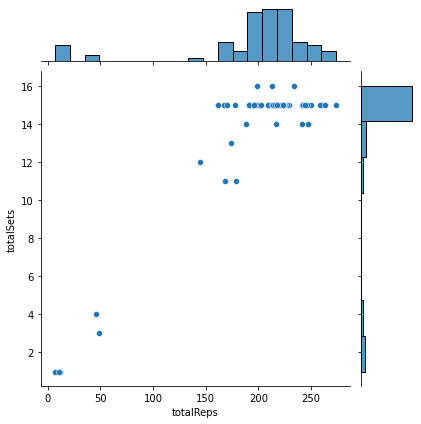

In [8]:
plt = sns.jointplot(data=df_str, x="totalReps", y="totalSets")
plt.set(title='Sets vs Reps')

In [9]:
df_str['avgHr'].describe()

count     81.000000
mean     131.135802
std        9.579605
min      106.000000
25%      125.000000
50%      132.000000
75%      137.000000
max      166.000000
Name: avgHr, dtype: float64

In [10]:
df_str['maxHr'].describe()

count     81.000000
mean     155.629630
std       10.322844
min      128.000000
25%      148.000000
50%      156.000000
75%      162.000000
max      183.000000
Name: maxHr, dtype: float64

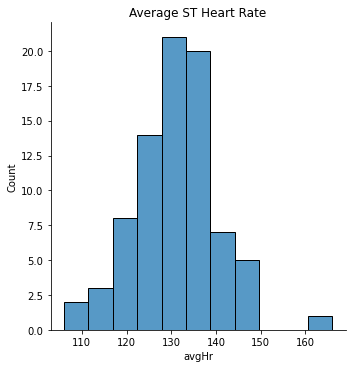

In [11]:
sns.displot(df_str, x="avgHr").set(title='Average ST Heart Rate')

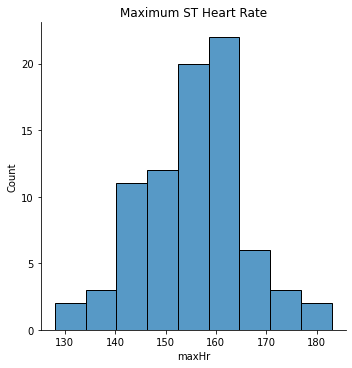

In [12]:
sns.displot(df_str, x="maxHr").set(title='Maximum ST Heart Rate')

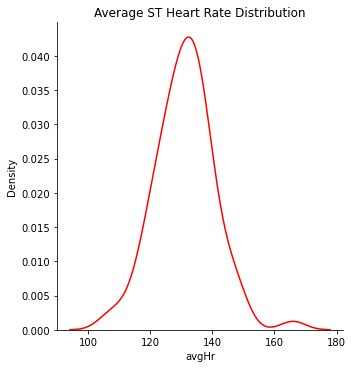

In [13]:
sns.displot(df_str, x="avgHr", kind="kde", color='red').set(title='Average ST Heart Rate Distribution')

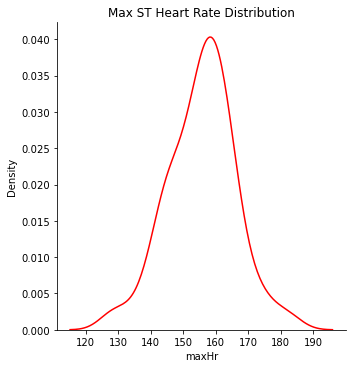

In [14]:
sns.displot(df_str, x="maxHr", kind="kde", color='red').set(title='Max ST Heart Rate Distribution')

## Cardio Training

In [15]:
df_cardio['avgHr'].describe()

count     69.000000
mean     113.863106
std       13.505755
min       80.000000
25%      103.000000
50%      117.000000
75%      125.000000
max      139.000000
Name: avgHr, dtype: float64

In [16]:
df_cardio['maxHr'].describe()

count     69.000000
mean     153.420290
std       11.228124
min      125.000000
25%      148.000000
50%      154.000000
75%      159.000000
max      181.000000
Name: maxHr, dtype: float64

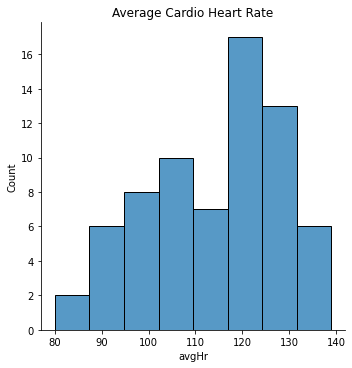

In [17]:
sns.displot(df_cardio, x="avgHr").set(title='Average Cardio Heart Rate')

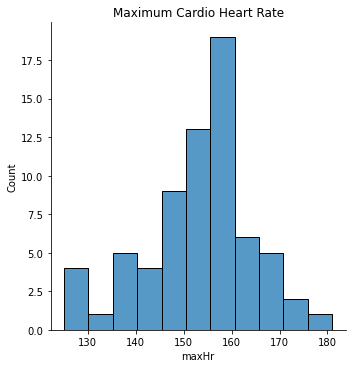

In [18]:
sns.displot(df_cardio, x="maxHr").set(title='Maximum Cardio Heart Rate')

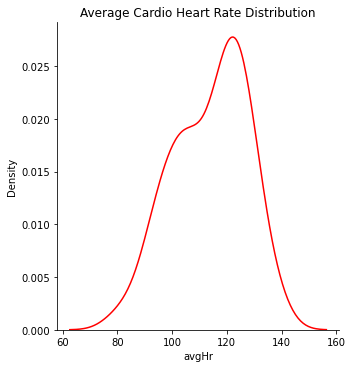

In [19]:
sns.displot(df_cardio, x="avgHr", kind="kde",color='red').set(title='Average Cardio Heart Rate Distribution')

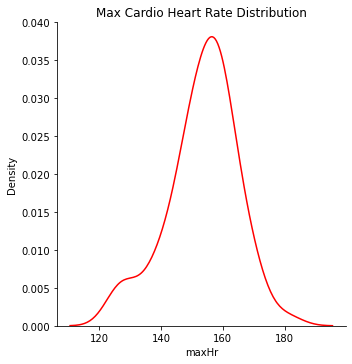

In [20]:
sns.displot(df_cardio, x="maxHr", kind="kde",color='red').set(title='Max Cardio Heart Rate Distribution')

### Indoor Rowing ('Erg')

AttributeError: 'JointGrid' object has no attribute 'axes'

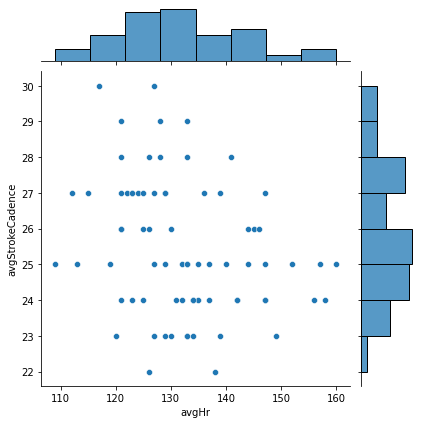

In [24]:
strokes_df = df.dropna(subset=['strokes'], inplace=False)
plt = sns.jointplot(data=strokes_df, x="avgHr", y="avgStrokeCadence").set(title='Erg Strokes/Min vs. Average HR')

In [25]:
strokes_df['strokes'].describe()

count     74.000000
mean     348.783784
std       97.200861
min      215.000000
25%      280.250000
50%      302.500000
75%      381.250000
max      539.000000
Name: strokes, dtype: float64

In [26]:
strokes_df['avgStrokeCadence'].describe()

count    74.000000
mean     25.459459
std       1.888605
min      22.000000
25%      24.000000
50%      25.000000
75%      27.000000
max      30.000000
Name: avgStrokeCadence, dtype: float64

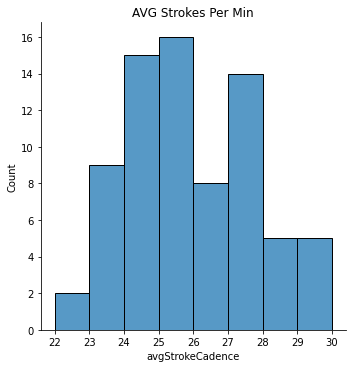

In [27]:
sns.displot(strokes_df, x='avgStrokeCadence').set(title='AVG Strokes Per Min')

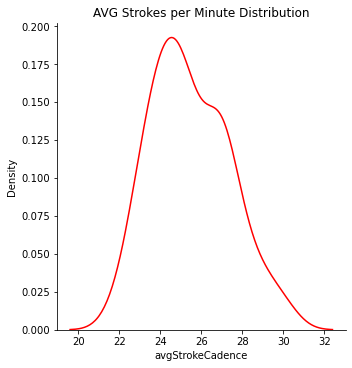

In [28]:
sns.displot(strokes_df, x='avgStrokeCadence', kind="kde",color='red').set(title='AVG Strokes per Minute Distribution')

## Summary Information

[Text(0.5, 1.0, 'Activities by Averge HR')]

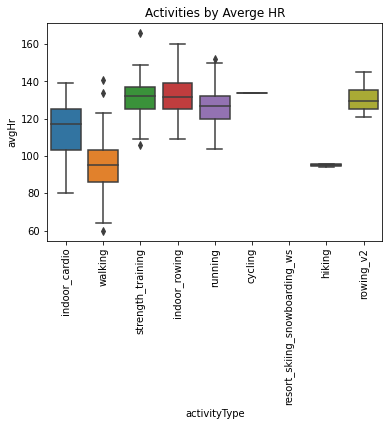

In [29]:
plt = sns.boxplot(x='activityType', y='avgHr', data=df)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90)
plt.set(title='Activities by Averge HR')

[Text(0.5, 1.0, 'Sports by Averge HR')]

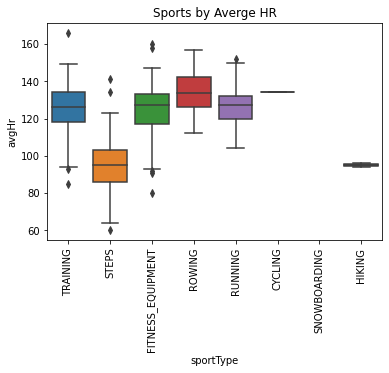

In [30]:
plt = sns.boxplot(x='sportType', y='avgHr', data=df)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90)
plt.set(title='Sports by Averge HR')

[Text(0.5, 1.0, 'Sports by Duration')]

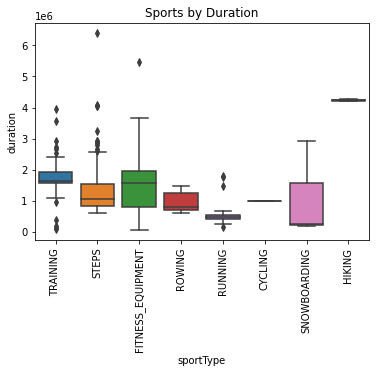

In [31]:
plt = sns.boxplot(x='sportType', y='duration', data=df)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90)
plt.set(title='Sports by Duration')

### Exercise Type Drilldown

In [32]:
exercises_df = df['summarizedExerciseSets'].explode()
exercises_df = pd.json_normalize(exercises_df)
exercises_df = exercises_df.dropna(how='all', inplace=False)

exercises_df.describe()

,reps,volume,duration,sets
count,329.000000,3.290000e+02,329.000000,329.000000
mean,48.270517,1.870643e+05,163781.592614,3.364742
std,36.627697,4.547797e+05,116813.083788,2.261981
min,1.000000,0.000000e+00,7293.000221,1.000000
25%,21.000000,0.000000e+00,92546.001434,2.000000
50%,32.000000,0.000000e+00,137074.001312,3.000000
75%,71.000000,2.175000e+05,201602.000237,4.000000
max,159.000000,3.626456e+06,711732.994080,13.000000


[Text(0.5, 1.0, 'Workout Reps')]

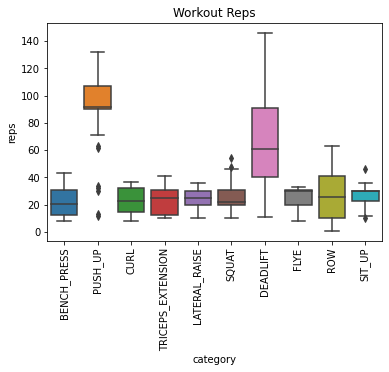

In [33]:
exercises_df = exercises_df[exercises_df['category'] != 'UNKNOWN']

plt = sns.boxplot(x='category', y='reps', data=exercises_df)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90)
plt.set(title='Workout Reps')